In [1]:
import pandas as pd

df = pd.read_csv("Hitters.csv")

In [2]:
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [3]:
df.drop('Unnamed: 0', axis='columns', inplace=True)
df.drop('League', axis='columns', inplace=True)
df.drop('Division', axis='columns', inplace=True)
df.drop('NewLeague', axis='columns', inplace=True)
df = df.dropna()

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [5]:
hist = df.hist()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [7]:
target = df['Salary']
y = target.to_numpy()
df.drop('Salary', axis='columns', inplace=True)
X = df.to_numpy()

Apply linear regression model to the dataset. 

In [8]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
reg = linear_model.LinearRegression().fit(X_train, y_train)
#intercept:
print('Intercept: ', reg.intercept_)
#slope:
print('Coefficient: ', reg.coef_)
#score
print('Score: ', reg.score(X_train, y_train))

Intercept:  76.7036547310276
Coefficient:  [-2.01545173  7.52014089  9.31255114 -1.71962539 -2.34094385  7.28579523
  7.68288092 -0.16596884  0.27487208 -0.53152817  1.16402282  0.65319882
 -0.828976    0.19879754  0.45228249 -5.30827395]
Score:  0.4964090046423758


In [9]:
y_pred = reg.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 258.3027717474275
Mean Squared Error: 132925.00445295317
Root Mean Squared Error: 364.58881558949827


## LASSO 

In [10]:
from sklearn.preprocessing import scale 

alphas = 10**np.linspace(-3,3,100)*0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Text(0, 0.5, 'weights')

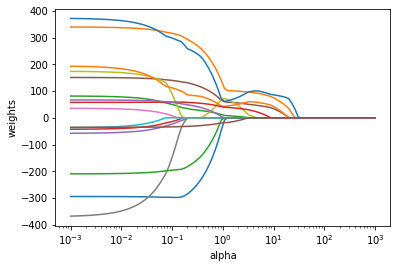

In [11]:
lasso = linear_model.Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [13]:
from sklearn.metrics import mean_squared_error

lasso.set_params(alpha=10)
lasso.fit(scale(X_train), y_train)
print(lasso.coef_)
mean_squared_error(y_test, lasso.predict(X_test))

[ 0.         34.07321248  0.          0.          0.          0.39413026
  0.          0.          0.          0.         71.38879309  0.
  0.          0.          0.         -0.        ]


1781543754.1400535

Hits, Walks and CRuns are left. 

In [14]:
lassocv = linear_model.LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

print(lassocv.alpha_)
print(lassocv.coef_)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

0.17769495773829372
[-1.61147129  5.7892548   3.1333385   0.         -0.          5.62872684
 -0.         -0.          0.          0.          0.72332514  0.27116836
 -0.58198225  0.18800662  0.26639862 -4.36705186]


135852.8089537244

10 factors are left. 

## Ridge

Text(0, 0.5, 'weights')

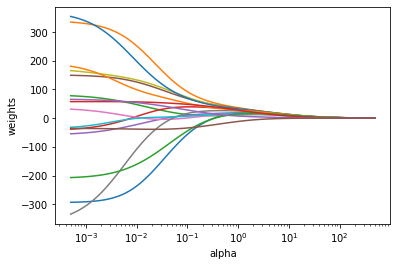

In [15]:
ridge = linear_model.Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [16]:
ridgecv = linear_model.RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
print(ridgecv.alpha_)
print(ridgecv.coef_)
ridge2 = linear_model.Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge2.fit(X_train, y_train)
mean_squared_error(y_test, ridge2.predict(X_test))

0.01637274581438864
[-1.39468464  4.79935601  4.40281008  0.72047761 -0.54641611  5.56738221
 -0.30675977 -0.02921369  0.19442495  0.0292191   0.50269509  0.2927105
 -0.55357281  0.19192036  0.33886867 -5.78568394]


138367.99232200132

## 2

Total error includes errors from bias and variance. If bias is high, variance will be low, and vice versa. Regularization plays a role to find an optimal point such that total error reaches the least value. For example in LASSO part in question 1, we pick regularization with 3 coefficients instead of the optimal 10 coefficients. This guarantees a small variance, but bias will be too large, resulting in a large total error. 